In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import os

df_list = []

embeddings_path = '/content/filtered_dataset_pet_supplies.parquet'
df = pd.read_parquet(embeddings_path)
df_list.append(df)

df = pd.concat(df_list, ignore_index=True)


In [3]:
df = df[(df['main_category'] == 'Toys & Games') | (df['main_category'] == 'Health & Personal Care')]

In [4]:
df

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
111,Toys & Games,Sea Monkeys 80483 Volcano Zoo,4.0,2680,"[The original and much-loved Sea Monkeys, the ...",[toys & games],21.49,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['How To Set Up Sea Monkeys Magic Ca...,Sea-monkeys,"[Pet Supplies, Fish & Aquatic Pets, Aquarium D...","{""Product Dimensions"": ""2.76 x 6.1 x 5.51 inch...",B0B613T3J4,None,None,None
114,Toys & Games,"Rubie's Sushi Pet Costume, X-Large",3.5,47,[Sushi pet costume includes soft plush nigiri ...,[Sushi pet costume includes soft plush nigiri ...,None,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Rubies Marvel Universe The Hulk Pe...,Rubie's,"[Pet Supplies, Dogs, Apparel & Accessories, Co...","{""Target Species"": ""Dog"", ""Size"": ""XL"", ""Minim...",B01J9R155I,None,None,None
146,Toys & Games,12 Packs Dog Talking Button Set for Communicat...,3.9,38,[Clear 30 Seconds Recording: these pet sound b...,[Features: Recordable answer buttons can not o...,32.99,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Programmable Talking Dog Buttons -...,Yunsailing,"[Pet Supplies, Dogs, Training & Behavior Aids,...","{""Package Dimensions"": ""12.64 x 7.91 x 3.98 in...",B0B71LCXFL,None,None,None
184,Health & Personal Care,Brown Sugar Pet Store 7 Piece Sugar Glider Red...,5.0,1,"[Free 1 x Velvet Sheet Size: 9 1/2"" x 9 1/2"" R...","[Package Include:, 1 x Velvet Red Devil Dome B...",None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Brown Sugar,"[Pet Supplies, Small Animals, Houses & Habitat...","{""Brand"": ""Brown Sugar"", ""Material"": ""Velvet"",...",B06Y67P1C1,None,None,None
687,Health & Personal Care,"Brine Shrimp Direct Spirulina Powder, 8 oz",4.5,257,"[Contains valuable nutritional, medicinal, and...",[8 oz Spirulina Powder. Spirulina is a blue-gr...,14.95,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Its feeding time in the planted ta...,Brine Shrimp Direct,"[Pet Supplies, Fish & Aquatic Pets, Food]","{""Brand"": ""Brine Shrimp Direct"", ""Flavor"": ""Sp...",B07RVCVL79,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251225,Health & Personal Care,"WABRINY Dog Use Liquid,Safe and Effective (0.5...",5.0,22,[Use materials that are safe and effective and...,[Easy to use.],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",WABRINY,"[Pet Supplies, Dogs]","{""Brand"": ""WABRINY"", ""Number of Items"": ""1"", ""...",B0C3CP5VBB,None,None,None
251311,Toys & Games,English Bulldog Plush Puppy with Harness and E...,4.4,20,[It’s time to take our favorite four-legged fr...,[Want to take your favorite four legged friend...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Funstuff,"[Pet Supplies, Dogs, Collars, Harnesses & Leas...","{""Package Dimensions"": ""15.24 x 10.12 x 4.53 i...",B08X1BJD33,None,None,None
251900,Health & Personal Care,Castle Rid-It Odor Eliminator Room Air Freshen...,4.5,5,[✅ Permanently eliminate foul odors in auto in...,"[CASTLE RID IT ODOR ELIMINATOR, PUT AN END TO ...",None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Sofasco Distributing,"[Pet Supplies, Dogs, Litter & Housebreaking, O...","{""Date First Available"": ""August 8, 2020"", ""Ma...",B08FFJ79Z5,None,None,None
252169,Health & Personal Care,Adventure Dog Medical Kit - Vet in a Box,4.8,12,[Disposable Skin Stapler:Close serious wounds ...,[Playing in the backyard or hiking the nearby ...,38.91,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Adventure Medical Kits,"[Pet Supplies, Dogs, Feeding & Watering Suppli...","{""Package Dimensions"": ""7.68 x 5.39 x 3.11 inc...",B08ZFVZPHM,None,None,None


In [5]:
df.iloc[0]['images']['large'][0]

'https://m.media-amazon.com/images/I/51kNLFn7MLL._AC_.jpg'

In [6]:
import ast

# Function to extract the first link from 'large'
def extract_first_large_link(image_data):
    try:
        # Parse the string to a dictionary if it's not already
        if isinstance(image_data, str):
            image_dict = ast.literal_eval(image_data)
        elif isinstance(image_data, dict):
            image_dict = image_data
        else:
            return None  # Handle unexpected data formats

        # Access the first link in 'large'
        return image_dict['large'][0]
    except (KeyError, IndexError, ValueError, SyntaxError) as e:
        # Return None if there's any issue
        return None

In [7]:
df['images'] = df['images'].apply(extract_first_large_link)

<ipython-input-7-c09c8aa09fea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['images'] = df['images'].apply(extract_first_large_link)


In [8]:
df_health = df[df['main_category'] == 'Health & Personal Care']
df_toy = df[df['main_category'] == 'Toys & Games']

In [9]:
df_health.shape

(1453, 16)

In [10]:
df_toy.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
111,Toys & Games,Sea Monkeys 80483 Volcano Zoo,4.0,2680,"[The original and much-loved Sea Monkeys, the ...",[toys & games],21.49,https://m.media-amazon.com/images/I/51kNLFn7ML...,{'title': ['How To Set Up Sea Monkeys Magic Ca...,Sea-monkeys,"[Pet Supplies, Fish & Aquatic Pets, Aquarium D...","{""Product Dimensions"": ""2.76 x 6.1 x 5.51 inch...",B0B613T3J4,None,None,None
114,Toys & Games,"Rubie's Sushi Pet Costume, X-Large",3.5,47,[Sushi pet costume includes soft plush nigiri ...,[Sushi pet costume includes soft plush nigiri ...,None,https://m.media-amazon.com/images/I/412IjUlIWb...,{'title': ['Rubies Marvel Universe The Hulk Pe...,Rubie's,"[Pet Supplies, Dogs, Apparel & Accessories, Co...","{""Target Species"": ""Dog"", ""Size"": ""XL"", ""Minim...",B01J9R155I,None,None,None
146,Toys & Games,12 Packs Dog Talking Button Set for Communicat...,3.9,38,[Clear 30 Seconds Recording: these pet sound b...,[Features: Recordable answer buttons can not o...,32.99,https://m.media-amazon.com/images/I/51yzo7hWcE...,{'title': ['Programmable Talking Dog Buttons -...,Yunsailing,"[Pet Supplies, Dogs, Training & Behavior Aids,...","{""Package Dimensions"": ""12.64 x 7.91 x 3.98 in...",B0B71LCXFL,None,None,None
979,Toys & Games,"Rubie's Wickedly Cute Tutu Dress Pet Costume, ...",4.5,50,"[Wickedly Cute Tutu Pet costume dress, Pet dre...",[Rubie's Costume Company has designed quality ...,None,https://m.media-amazon.com/images/I/41jm1llk3i...,{'title': ['Rubies Costume Barbie Girl Tutu Pe...,Rubie's,"[Pet Supplies, Dogs, Apparel & Accessories, Co...","{""Size"": ""Medium"", ""Chest Size"": ""34 Inches"", ...",B07J2GHQ1K,None,None,None
1214,Toys & Games,"Rasta Big Dog Boutique, XXX-Large",4.2,47,[Rasta pet costume features shirt with pattern...,[Rubie's line of big dogs costumes knows that ...,35.39,https://m.media-amazon.com/images/I/51s+czo81N...,{'title': ['Rubie's Big Dog Dapper Dog Costume...,Rubie's,"[Pet Supplies, Dogs, Apparel & Accessories, Co...","{""Target Species"": ""Dog"", ""Size"": ""3X"", ""Neck ...",B01MZ0SKUL,None,None,None


In [11]:
file_path_toy = 'filtered_pet_supplies_toys.csv'

# Save the DataFrame to CSV
df_toy.to_csv(file_path_toy, index=False)

In [12]:
file_path_hh = 'filtered_pet_supplies_healthhousehold.csv'

# Save the DataFrame to CSV
df_health.to_csv(file_path_hh, index=False)


## Building product suggestions for subcategories in Pet Supplies - Toys & Games and Health and Personal.

In [13]:
pip install pinecone pinecone-client mplcursors --q

In [14]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import ast
import torch
from tqdm import tqdm
import pinecone
import multiprocessing as mp
from transformers import CLIPProcessor, CLIPModel, CLIPVisionModelWithProjection, CLIPTextModelWithProjection
from PIL import Image
import os
from transformers import CLIPProcessor, CLIPModel, CLIPTextModel, CLIPTextModelWithProjection
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model.eval()

model_text = CLIPTextModelWithProjection.from_pretrained("openai/clip-vit-base-patch16").to(device)
processor_text = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model_text.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


CLIPTextModelWithProjection(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerN

In [16]:
#Get Embeddings for User Query
def get_embeddings(query):
    text_inputs = processor(text=query, return_tensors="pt", padding=True, truncation = True)
    text_inputs = {k: v.to(device) for k, v in text_inputs.items()}  # Move text inputs to GPU
    # print(text_inputs['input_ids'])
    with torch.no_grad():
        # text_embeds = model.get_text_features(**text_inputs)
        # text_embeds = model(**text_inputs)
        # text_embeds = text_embeds.pooler_output
        # text_embeds = text_embeds.cpu()
        text_embeds = model_text(input_ids=text_inputs['input_ids'], attention_mask=text_inputs['attention_mask']).text_embeds
        # print(text_embeds
    return text_embeds

In [17]:
#Function to Retrieve From Pinecone

def pinecone_retrieve(category, user_query, top_k, upload_strategy_file_path):

  df = pd.read_csv(upload_strategy_file_path)
  df.drop(columns=['Task Done (Yes/No)'], inplace = True)
  df = df.loc[(df['Type'] == 'add') | (df['Type'] == 'image only')]
  df = df.loc[df['Category'] == category]
  df = df.reset_index(drop = True)

  user_query_embedding = get_embeddings(user_query).detach().cpu()
  user_query_numpy = user_query_embedding.numpy()
  # if normalize_flag == 1:
  #   user_query_numpy = user_query_numpy/np.linalg.norm(user_query_numpy, ord=2, axis = 1)
  user_query_list = user_query_numpy.tolist()

  #Retrieve Image+Text
  pc_image_text = pinecone.Pinecone(api_key = df.loc[df['Type'] == 'add', ['API Keys']].values[0][0])

  index_image_text = pc_image_text.Index(df.loc[df['Type'] == 'add', ['Index Name']].values[0][0],
                  host = df.loc[df['Type'] == 'add', ['Host']].values[0][0])

  response = index_image_text.query(
      namespace="",
      vector= user_query_list[0],
      top_k = top_k, #How many vectors to retrieve
      include_values = True, #Return the actual vectors as well
      include_metadata=True,
      #filter={"genre": {"$eq": "action"}}
  )

  data = []
  for match in response['matches']:
      data.append({
          'id': match['id'],
          'score': match['score'],
          'vector': match['values'], #Add Vectors
          **match.get('metadata', {})# Add metadata if available
      })

  response_df_image_text = pd.DataFrame(data)
  response_df_image_text = response_df_image_text.sort_values(by = 'score', ascending = False)
  response_df_image_text = response_df_image_text.reset_index(drop = True)
  response_df_image_text['source'] = 'Text + Image'


  #Retrieve Image Only
  pc_image = pinecone.Pinecone(api_key = df.loc[df['Type'] == 'image only', ['API Keys']].values[0][0])

  index_image = pc_image.Index(df.loc[df['Type'] == 'image only', ['Index Name']].values[0][0],
                  host = df.loc[df['Type'] == 'image only', ['Host']].values[0][0])

  response = index_image.query(
      namespace="",
      vector= user_query_list[0],
      top_k = top_k, #How many vectors to retrieve
      include_values = True, #Return the actual vectors as well
      include_metadata=True,
      #filter={"genre": {"$eq": "action"}}
  )

  data = []
  for match in response['matches']:
      data.append({
          'id': match['id'],
          'score': match['score'],
          'vector': match['values'], #Add Vectors
          **match.get('metadata', {})# Add metadata if available
      })

  response_df_image = pd.DataFrame(data)
  response_df_image = response_df_image.sort_values(by = 'score', ascending = False)
  response_df_image = response_df_image.reset_index(drop = True)
  response_df_image['source'] = 'Image'


  response_df = pd.concat([response_df_image_text, response_df_image], axis = 0)
  response_df = response_df.sort_values(by = 'score', ascending = False)
  response_df = response_df.reset_index(drop = True)


  return user_query_list[0], response_df

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import textwrap
import mplcursors

def plot_product_recommendations(df, title):
    """
    Plots product recommendations in a 2x5 grid from a DataFrame containing
    image URLs and product titles with hover functionality for descriptions.

    Parameters:
    df (pd.DataFrame): DataFrame with 'image_url', 'title', and 'description' columns.
    title (str): Main title for the plot.
    """
    # Check if DataFrame has the required columns
    if not all(col in df.columns for col in ['image_url', 'title', 'description']):
        raise ValueError("DataFrame must contain 'image_url', 'title', and 'description' columns.")

    # Create a 4x5 grid
    fig, axs = plt.subplots(2, 5, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)

    # Loop through the grid and fill it with images and titles
    for ax, (index, row) in zip(axs.flatten(), df.iterrows()):
        # Fetch the image from the URL
        try:
            response = requests.get(row['image_url'])
            img = Image.open(BytesIO(response.content))
        except Exception as e:
            print(f"Error loading image at index {index}: {e}")
            img = np.random.rand(10, 10, 3)  # Use a random image if loading fails

        ax.imshow(img)

        # Wrap the title to avoid overlapping
        wrapped_title = textwrap.fill(row['title']+' Source: '+row['source'], width=30)  # Adjust the width as needed
        ax.set_title(wrapped_title, fontsize=10, pad=3)  # Added pad for spacing
        ax.axis('off')  # Hide the axes

    # Adjust layout to prevent overlap
    plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Increase spacing between plots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title

    # Create interactive cursor to display descriptions on hover
    cursor = mplcursors.cursor(axs.flatten(), hover=True)

    # Set hover behavior to show the product description
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(df['description'].iloc[sel.index])
        sel.annotation.get_bbox().set_facecolor('white')
        sel.annotation.get_bbox().set_alpha(0.8)

    plt.show()



## Zero-shot prompting for text embeddings inclusion strategy

In [19]:
from transformers import pipeline
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from collections import Counter


classifier = pipeline("zero-shot-classification",
                      model="knowledgator/comprehend_it-base")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def get_most_frequent_label(query, candidate_labels, print_flag = 1):
    """
    Processes a query to classify its components and returns the most frequent label.

    Args:
        query (str): The input text to classify.
        candidate_labels (list): The list of candidate labels for classification.

    Returns:
        str: The most frequent label in the query based on classification results.
    """
    # Split words and remove stopwords
    words = query.split()
    words = [word for word in words if word.lower() not in stopwords.words('english')]

    # Classify each word and collect labels
    labels = []
    for word in words:
        results = classifier(word, candidate_labels)
        if print_flag == 1:
          print(results)
        labels.append(results['labels'][0])

    # Calculate the most frequent label
    label_counts = Counter(labels)
    #print('label_counts: ', label_counts)
    most_frequent_label = label_counts.most_common(1)[0][0]  # Get the most frequent label

    if most_frequent_label == candidate_labels[0]:
      return True
    else:
      return False

## USer-query

In [21]:
# Example usage
user_query = "superhero dog costumes"

In [22]:

candidate_labels = ['feeling or adjective or quality', 'animal or color or shape or object']

words = user_query.split()
words = [word for word in words if word.lower() not in stopwords.words('english')] #Remove Stopwords

scores = []

for word in words:
  results = classifier(word, candidate_labels)
  print(results)
  scores.append(results)

flag_perform_weighted_sum = get_most_frequent_label(user_query, candidate_labels, 1)
print("flag_perform_weighted_sum:", flag_perform_weighted_sum)

{'sequence': 'superhero', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9598863124847412, 0.04011370614171028]}
{'sequence': 'dog', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9756807088851929, 0.024319326505064964]}
{'sequence': 'costumes', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9388092756271362, 0.061190683394670486]}
{'sequence': 'superhero', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9598863124847412, 0.04011370614171028]}
{'sequence': 'dog', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9756807088851929, 0.024319326505064964]}
{'sequence': 'costumes', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9388092756271362, 0.061190683394670486]}
flag_perform_weighted_sum:

In [23]:
print(words)

scores

['superhero', 'dog', 'costumes']


[{'sequence': 'superhero',
  'labels': ['animal or color or shape or object',
   'feeling or adjective or quality'],
  'scores': [0.9598863124847412, 0.04011370614171028]},
 {'sequence': 'dog',
  'labels': ['animal or color or shape or object',
   'feeling or adjective or quality'],
  'scores': [0.9756807088851929, 0.024319326505064964]},
 {'sequence': 'costumes',
  'labels': ['animal or color or shape or object',
   'feeling or adjective or quality'],
  'scores': [0.9388092756271362, 0.061190683394670486]}]

In [24]:
#All in One Retrieval Process
def get_recs(user_query, category, candidate_labels, top_k, upload_strategy_file_path, plot_flag = 1):
  q, x = pinecone_retrieve(category = category,
                          user_query = user_query,
                          top_k = top_k,
                          upload_strategy_file_path = upload_strategy_file_path)

  flag_perform_weighted_sum = get_most_frequent_label(user_query, candidate_labels, 0)

  if flag_perform_weighted_sum == True:
    # Filter the DataFrame for the two product categories
    text_image_prods = x[x['source'] == 'Text + Image']
    image_only_prods = x[x['source'] == 'Image']

    # Perform the weighted sum of scores
    text_image_scores = 0.25 * text_image_prods['score']
    image_only_scores = 0.75 * image_only_prods['score']

    # print(text_image_scores)
    # Add the weighted scores as a new column in their respective DataFrames
    text_image_prods = text_image_prods.assign(weighted_scores=text_image_scores)
    image_only_prods = image_only_prods.assign(weighted_scores=image_only_scores)

    # Combine the two DataFrames
    combined_df = pd.concat([text_image_prods, image_only_prods])

    # Sort the combined DataFrame by weighted scores in descending order
    sorted_combined_df = combined_df.sort_values(by='weighted_scores', ascending=False)
    sorted_combined_df = sorted_combined_df.reset_index(drop = True)

    # Display the sorted DataFrame
    #print(sorted_combined_df)
    if plot_flag == 1:
      plot_product_recommendations(sorted_combined_df, 'Weighted combination')
    return q, sorted_combined_df


  else:
      # Show image-only products
      image_only_prods = x[x['source'] == 'Image']
      image_only_prods = image_only_prods.reset_index(drop = True)

      if plot_flag == 1:
        plot_product_recommendations(image_only_prods, 'Image only Recommendations')
      return q, image_only_prods


In [25]:
q_embedding, result_df = get_recs(user_query = user_query,
         category = 'Pet Supplies',
         top_k = 10,
         upload_strategy_file_path = '/content/Pinecone Upload Strategy - Eval.csv',
         candidate_labels = ['feeling or adjective or quality', 'animal or color or shape or object'],
         plot_flag = 0)

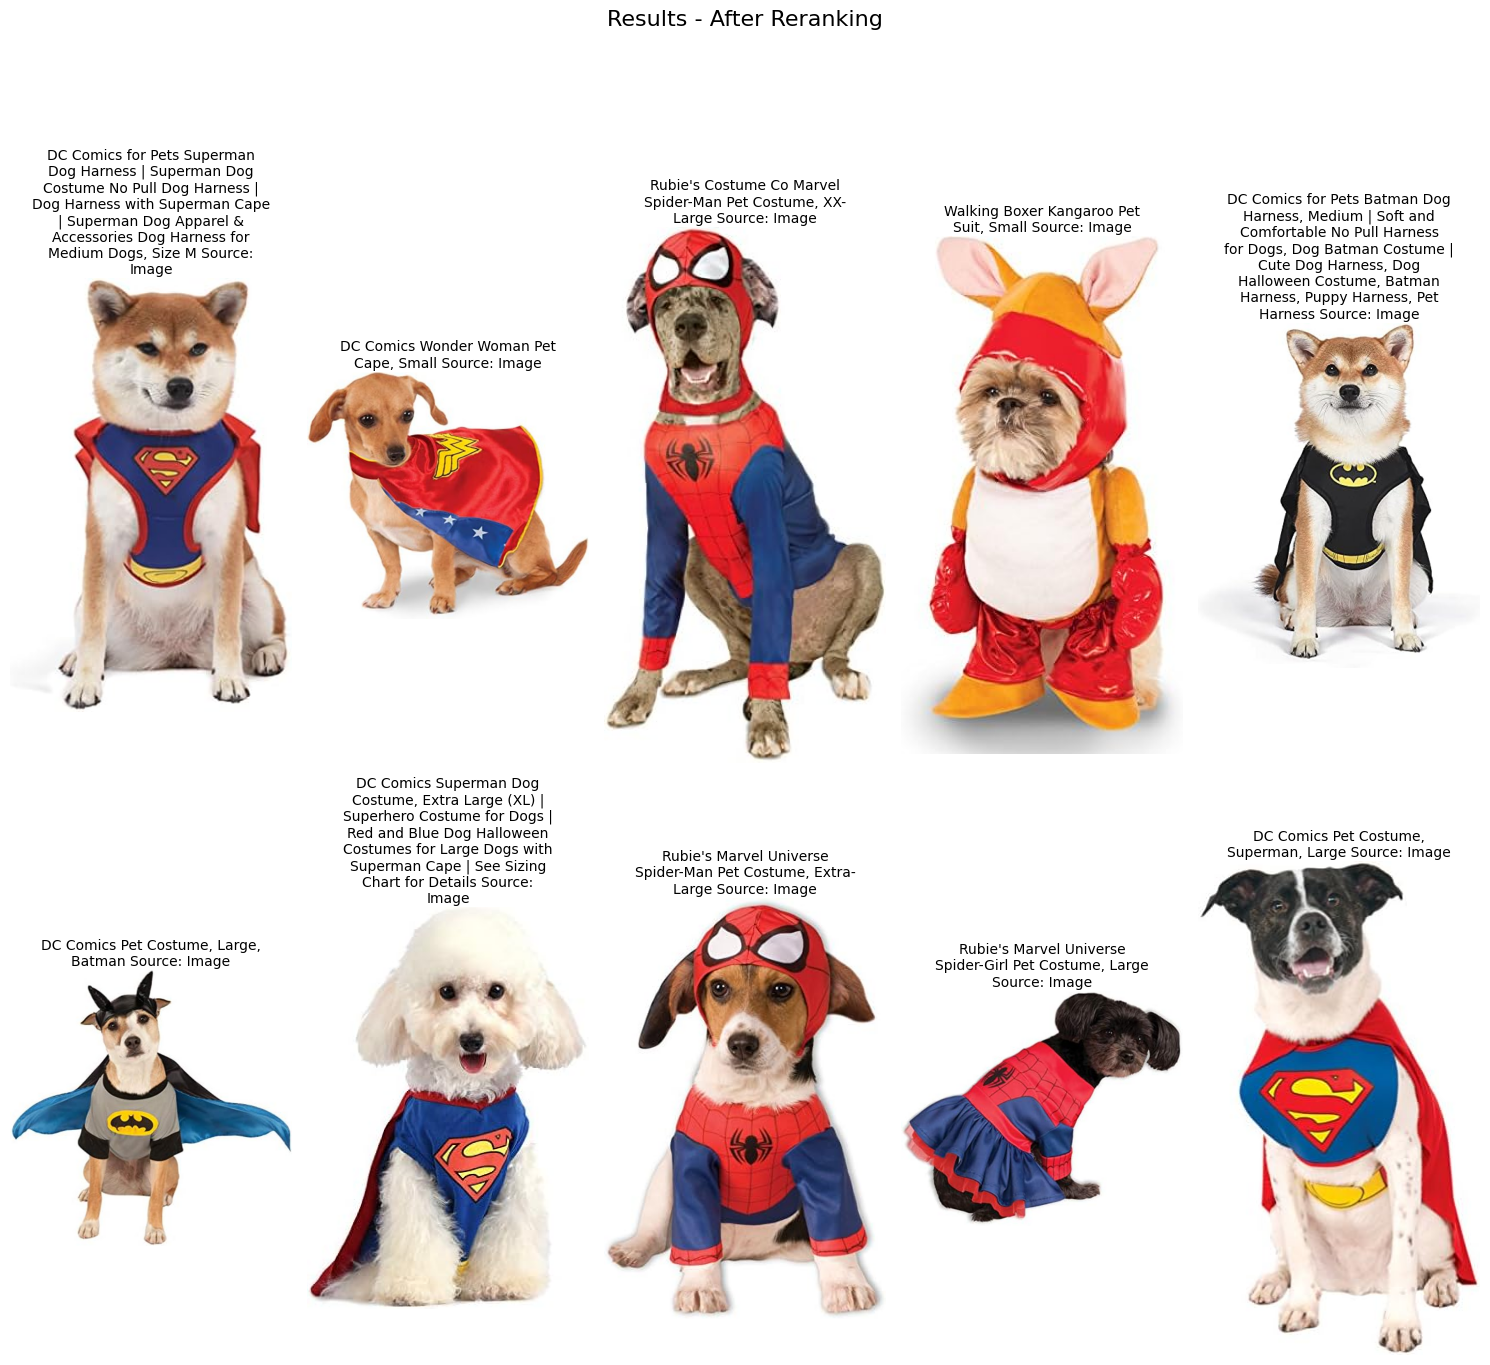

In [26]:
plot_product_recommendations(result_df, 'Results - After Reranking')


## Image-embeddings clustering

In [27]:
!pip install kneed --q

Silhouette Scores: 
 {2: 0.07700048845280928, 3: 0.07959966394918755, 4: 0.09928443490820009, 5: 0.09483458333311084, 6: 0.09109723822078562, 7: 0.09298745028523532, 8: 0.105788645439466, 9: 0.0972452030901319, 10: 0.09822023288465306}
Optimal k: 8


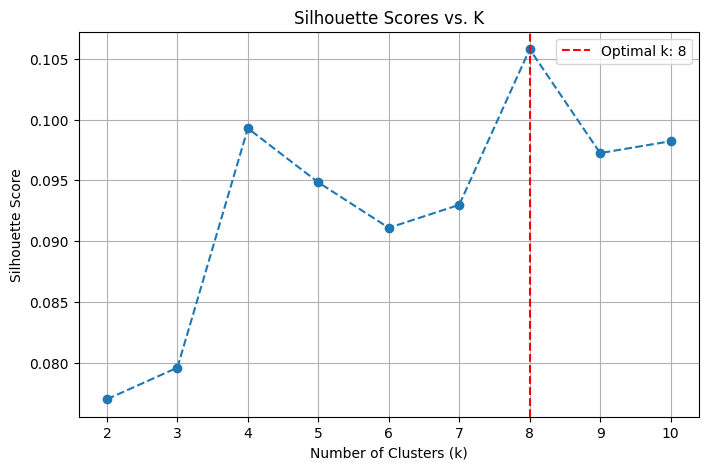

<ipython-input-28-82b069dcc7ee>:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_df1.rename(columns = {'similarity': 'image_only_similarity'}, inplace = True)


,id,title,image_url,image_only_similarity
0,B07J293N14,Rubie's Wizard Cape with Headpiece and Light-U...,https://m.media-amazon.com/images/I/41N9TXP33j...,0.308527
1,B010QXXCOQ,Rubie's LED Light-Up Halloween Hoodie Dog Costume,https://m.media-amazon.com/images/I/41HzUPhyJZ...,0.305776
2,B002GWUE9M,Deluxe Cheerleader Pet Costume,https://m.media-amazon.com/images/I/51k-WKozpW...,0.300800
3,B07D3DVNMS,Forum Novelties 81257 Football Sports Cheerlea...,https://m.media-amazon.com/images/I/41pDGbCbXw...,0.297313
4,B004990KS0,Basketball Air Bud Dog Costume,https://m.media-amazon.com/images/I/31NFQ1zj4o...,0.290320
5,B07BWN3WHG,"Rubie's Pet Costume, Small, Pageant Queen",https://m.media-amazon.com/images/I/41HnPoPM9R...,0.286099
6,B07J2GHQ1K,"Rubie's Wickedly Cute Tutu Dress Pet Costume, ...",https://m.media-amazon.com/images/I/41jm1llk3i...,0.285692


In [28]:
#Clustering Image Only

from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Fetch top 50 products from Pinecone based on user query
category = 'Pet Supplies'
user_queries = ["superhero dog costumes"]

q, x = pinecone_retrieve(
    category=category,
    user_query=user_queries[0],
    top_k=50,
    upload_strategy_file_path='/content/Pinecone Upload Strategy - Eval.csv'
)

query_embeddings = np.array([get_embeddings(query).cpu() for query in user_queries])
image_only = x[x['source'] == 'Image'][['id', 'title', 'image_url', 'vector']]

product_embeddings = np.stack(image_only['vector'].to_numpy())

# ssd = []
# max_k = 10

# # Calculate SSD for each k
# for k in range(1, max_k + 1):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(product_embeddings)
#     ssd.append(kmeans.inertia_)

# # Find the elbow using KneeLocator
# kneedle = KneeLocator(range(1, max_k + 1), ssd, curve="convex", direction="decreasing")
# optimal_k = kneedle.knee

# Plot the elbow curve with the optimal k highlighted
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, max_k + 1), ssd, marker='o', linestyle='--')
# plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k: {optimal_k}")
# plt.title("Elbow Method for Optimal k")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Sum of Squared Distances (SSD)")
# plt.legend()
# plt.grid()
# plt.show()

silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(product_embeddings)
    silhouette_avg = silhouette_score(product_embeddings, cluster_labels)
    silhouette_scores[k] = silhouette_avg

print(f"Silhouette Scores: \n {silhouette_scores}")

# Find the optimal k based on the highest silhouette score
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal k: {optimal_k}")

# Plot the Silhouette Score Curve with the optimal k highlighted
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), list(silhouette_scores.values()), marker='o', linestyle='--')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k: {optimal_k}")
plt.title("Silhouette Scores vs. K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

n_clusters = optimal_k  # Adjust based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
product_labels = kmeans.fit_predict(product_embeddings)

query_embeddings = query_embeddings.reshape(-1, query_embeddings.shape[-1])
query_embeddings = query_embeddings.astype(np.float64)

query_cluster = kmeans.predict(query_embeddings)[0]  # Get the cluster for the query
same_cluster_indices = np.where(product_labels == query_cluster)[0]

# Embeddings and metadata for products in the same cluster
cluster_embeddings = product_embeddings[same_cluster_indices]
cluster_metadata = image_only.iloc[same_cluster_indices]

# Compute cosine similarities
similarities = cosine_similarity(query_embeddings.reshape(1, -1), cluster_embeddings).flatten()

# Sort products by similarity
sorted_indices = np.argsort(similarities)[::-1]  # Sort by descending similarity
top_products = cluster_metadata.iloc[sorted_indices[:10]].copy()  # Get top 10 products

# Add similarity scores to the DataFrame
top_products['similarity'] = similarities[sorted_indices[:10]]


# Convert top products to a DataFrame
top_products_df = top_products[['id', 'image_url', 'similarity']]

# Return the DataFrame
top_products_df = pd.merge(top_products_df, image_only, on=['id', 'image_url'], how='inner')
top_products_df1 = top_products_df[['id', 'title', 'image_url', 'similarity']]

if flag_perform_weighted_sum == True:
  top_products_df1['similarity'] = 0.75 * top_products_df1['similarity']

top_products_df1.rename(columns = {'similarity': 'image_only_similarity'}, inplace = True)
top_products_df1


Silhouette Scores: 
 {2: 0.1782135275603941, 3: 0.05821880215688669, 4: 0.06459298302639312, 5: 0.06359310109096165, 6: 0.05565645059048773, 7: 0.07572579323488814, 8: 0.09039310361392541, 9: 0.08007747137617315, 10: 0.08079841884300437}
Optimal k: 2


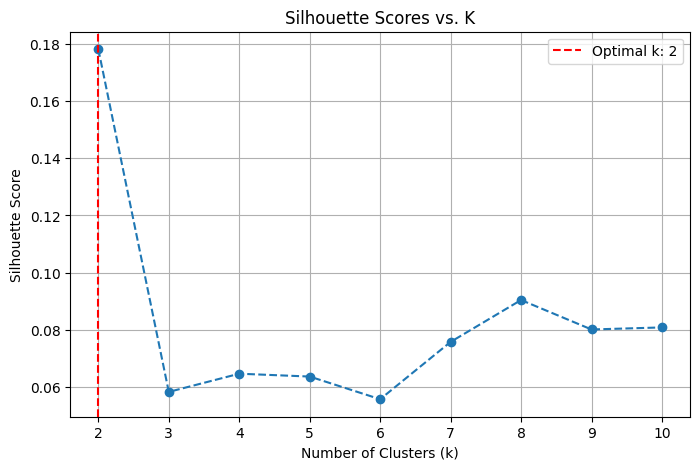

<ipython-input-29-a5239fefe376>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_df2.rename(columns = {'similarity': 'text+image_similarity'}, inplace = True)


,id,title,image_url,text+image_similarity
0,B003ANQDN2,Rescue Pets Train and Play Puppy,https://m.media-amazon.com/images/I/41lYgQOm9V...,0.563935
1,B004I07IK8,Do You Mind The Game for People and Dogs,https://m.media-amazon.com/images/I/41JUCJrp6V...,0.545647
2,B00SKYNNUW,Samorthatrade Invisible Dog Leash,https://m.media-amazon.com/images/I/41omHcYisr...,0.541258
3,B0069ASXQI,Chomp Dogs Eraseables,https://m.media-amazon.com/images/I/510VWnKXoT...,0.540005
4,B005N4E112,ILS Dog Sunglasses,https://m.media-amazon.com/images/I/41ZZg2RSc5...,0.532161
5,B08LV1K8LZ,"Cute Little Puppy - Flip Over Dog, Somersaults...",https://m.media-amazon.com/images/I/51NoQyn33k...,0.524957
6,B01BZV5IQS,"Dog Food and Treats Sample Box, 7 or more samp...",https://m.media-amazon.com/images/I/41ClhGcMVZ...,0.513971
7,B009RS137K,K-9 Toy Pack 3 Piece,https://m.media-amazon.com/images/I/51nSnojNLB...,0.511747
8,B07BC3TYJH,"Our Generation Pitbull Dog, bd37801z",https://m.media-amazon.com/images/I/41d8hcBEsl...,0.508556
9,B08FC27BS3,"Emotion Pets - Cry Pets - Single Puppy, Soft T...",https://m.media-amazon.com/images/I/51qNNnub1D...,0.507851


In [29]:
#Clustering Text+Image

non_image_only = x[x['source'] != 'Image'][['id', 'title', 'image_url', 'vector']]

product_embeddings = np.stack(non_image_only['vector'].to_numpy())

# ssd = []
# max_k = 10

# # Calculate SSD for each k
# for k in range(1, max_k + 1):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(product_embeddings)
#     ssd.append(kmeans.inertia_)

# # Find the elbow using KneeLocator
# kneedle = KneeLocator(range(1, max_k + 1), ssd, curve="convex", direction="decreasing")
# optimal_k = kneedle.knee

# Plot the elbow curve with the optimal k highlighted
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, max_k + 1), ssd, marker='o', linestyle='--')
# plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k: {optimal_k}")
# plt.title("Elbow Method for Optimal k")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Sum of Squared Distances (SSD)")
# plt.legend()
# plt.grid()
# plt.show()

silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(product_embeddings)
    silhouette_avg = silhouette_score(product_embeddings, cluster_labels)
    silhouette_scores[k] = silhouette_avg

print(f"Silhouette Scores: \n {silhouette_scores}")

# Find the optimal k based on the highest silhouette score
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal k: {optimal_k}")

# Plot the Silhouette Score Curve with the optimal k highlighted
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), list(silhouette_scores.values()), marker='o', linestyle='--')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k: {optimal_k}")
plt.title("Silhouette Scores vs. K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

n_clusters = optimal_k  # Adjust based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
product_labels = kmeans.fit_predict(product_embeddings)

query_embeddings = query_embeddings.reshape(-1, query_embeddings.shape[-1])
query_embeddings = query_embeddings.astype(np.float64)

query_cluster = kmeans.predict(query_embeddings)[0]  # Get the cluster for the query
same_cluster_indices = np.where(product_labels == query_cluster)[0]

# Embeddings and metadata for products in the same cluster
cluster_embeddings = product_embeddings[same_cluster_indices]
cluster_metadata = non_image_only.iloc[same_cluster_indices]

# Compute cosine similarities
similarities = cosine_similarity(query_embeddings.reshape(1, -1), cluster_embeddings).flatten()

# Sort products by similarity
sorted_indices = np.argsort(similarities)[::-1]  # Sort by descending similarity
top_products = cluster_metadata.iloc[sorted_indices[:10]].copy()  # Get top 10 products

# Add similarity scores to the DataFrame
top_products['similarity'] = similarities[sorted_indices[:10]]


# Convert top products to a DataFrame
top_products_df = top_products[['id', 'image_url', 'similarity']]

# Return the DataFrame
top_products_df = pd.merge(top_products_df, non_image_only, on=['id', 'image_url'], how='inner')
top_products_df2 = top_products_df[['id', 'title', 'image_url', 'similarity']]

if flag_perform_weighted_sum == True:
  top_products_df2['similarity'] = 0.25 * top_products_df2['similarity']

top_products_df2.rename(columns = {'similarity': 'text+image_similarity'}, inplace = True)
top_products_df2

In [30]:
if flag_perform_weighted_sum == True:
  top_products_df = pd.merge(top_products_df1, top_products_df2, on = ['id', 'title', 'image_url'], how = 'outer')
  top_products_df.fillna(0, inplace = True)
  top_products_df['similarity'] = top_products_df['image_only_similarity'] + top_products_df['text+image_similarity']
  top_products_df.sort_values(by = 'similarity', ascending = False, inplace = True)
  top_products_df = top_products_df.reset_index(drop = True)
  top_products_df = top_products_df[['id', 'title', 'image_url', 'similarity']]
  top_products_df = top_products_df.head(10)
  top_products_df
else:
  top_products_df = top_products_df1
  top_products_df.rename(columns = {'image_only_similarity': 'similarity'}, inplace = True)
  top_products_df.sort_values(by = 'similarity', ascending = False, inplace = True)
  top_products_df = top_products_df.reset_index(drop = True)
  top_products_df = top_products_df.head(10)
  top_products_df

<ipython-input-30-644440ae3323>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_df.rename(columns = {'image_only_similarity': 'similarity'}, inplace = True)
<ipython-input-30-644440ae3323>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_df.sort_values(by = 'similarity', ascending = False, inplace = True)


In [31]:
top_products_df

,id,title,image_url,similarity
0,B07J293N14,Rubie's Wizard Cape with Headpiece and Light-U...,https://m.media-amazon.com/images/I/41N9TXP33j...,0.308527
1,B010QXXCOQ,Rubie's LED Light-Up Halloween Hoodie Dog Costume,https://m.media-amazon.com/images/I/41HzUPhyJZ...,0.305776
2,B002GWUE9M,Deluxe Cheerleader Pet Costume,https://m.media-amazon.com/images/I/51k-WKozpW...,0.300800
3,B07D3DVNMS,Forum Novelties 81257 Football Sports Cheerlea...,https://m.media-amazon.com/images/I/41pDGbCbXw...,0.297313
4,B004990KS0,Basketball Air Bud Dog Costume,https://m.media-amazon.com/images/I/31NFQ1zj4o...,0.290320
5,B07BWN3WHG,"Rubie's Pet Costume, Small, Pageant Queen",https://m.media-amazon.com/images/I/41HnPoPM9R...,0.286099
6,B07J2GHQ1K,"Rubie's Wickedly Cute Tutu Dress Pet Costume, ...",https://m.media-amazon.com/images/I/41jm1llk3i...,0.285692


In [32]:
for i in range(len(top_products_df)):
  id = top_products_df.loc[i, 'id']
  top_products_df.loc[i, 'description'] = x[x['id'] == id]['description'].values[0]

  top_products_df.loc[i, 'source'] = 'Clustering'

top_products_df

,id,title,image_url,similarity,description,source
0,B07J293N14,Rubie's Wizard Cape with Headpiece and Light-U...,https://m.media-amazon.com/images/I/41N9TXP33j...,0.308527,Light-up wizard costume includes headpiece and...,Clustering
1,B010QXXCOQ,Rubie's LED Light-Up Halloween Hoodie Dog Costume,https://m.media-amazon.com/images/I/41HzUPhyJZ...,0.305776,Your pup will light up the party in this LED H...,Clustering
2,B002GWUE9M,Deluxe Cheerleader Pet Costume,https://m.media-amazon.com/images/I/51k-WKozpW...,0.300800,Blue and white cheerleader dress for your spir...,Clustering
3,B07D3DVNMS,Forum Novelties 81257 Football Sports Cheerlea...,https://m.media-amazon.com/images/I/41pDGbCbXw...,0.297313,includes: one piece costume,Clustering
4,B004990KS0,Basketball Air Bud Dog Costume,https://m.media-amazon.com/images/I/31NFQ1zj4o...,0.290320,Have your best friend join in the holiday fest...,Clustering
5,B07BWN3WHG,"Rubie's Pet Costume, Small, Pageant Queen",https://m.media-amazon.com/images/I/41HnPoPM9R...,0.286099,This Pageant Queen pet costume includes a two ...,Clustering
6,B07J2GHQ1K,"Rubie's Wickedly Cute Tutu Dress Pet Costume, ...",https://m.media-amazon.com/images/I/41jm1llk3i...,0.285692,Rubie's Costume Company has designed quality c...,Clustering


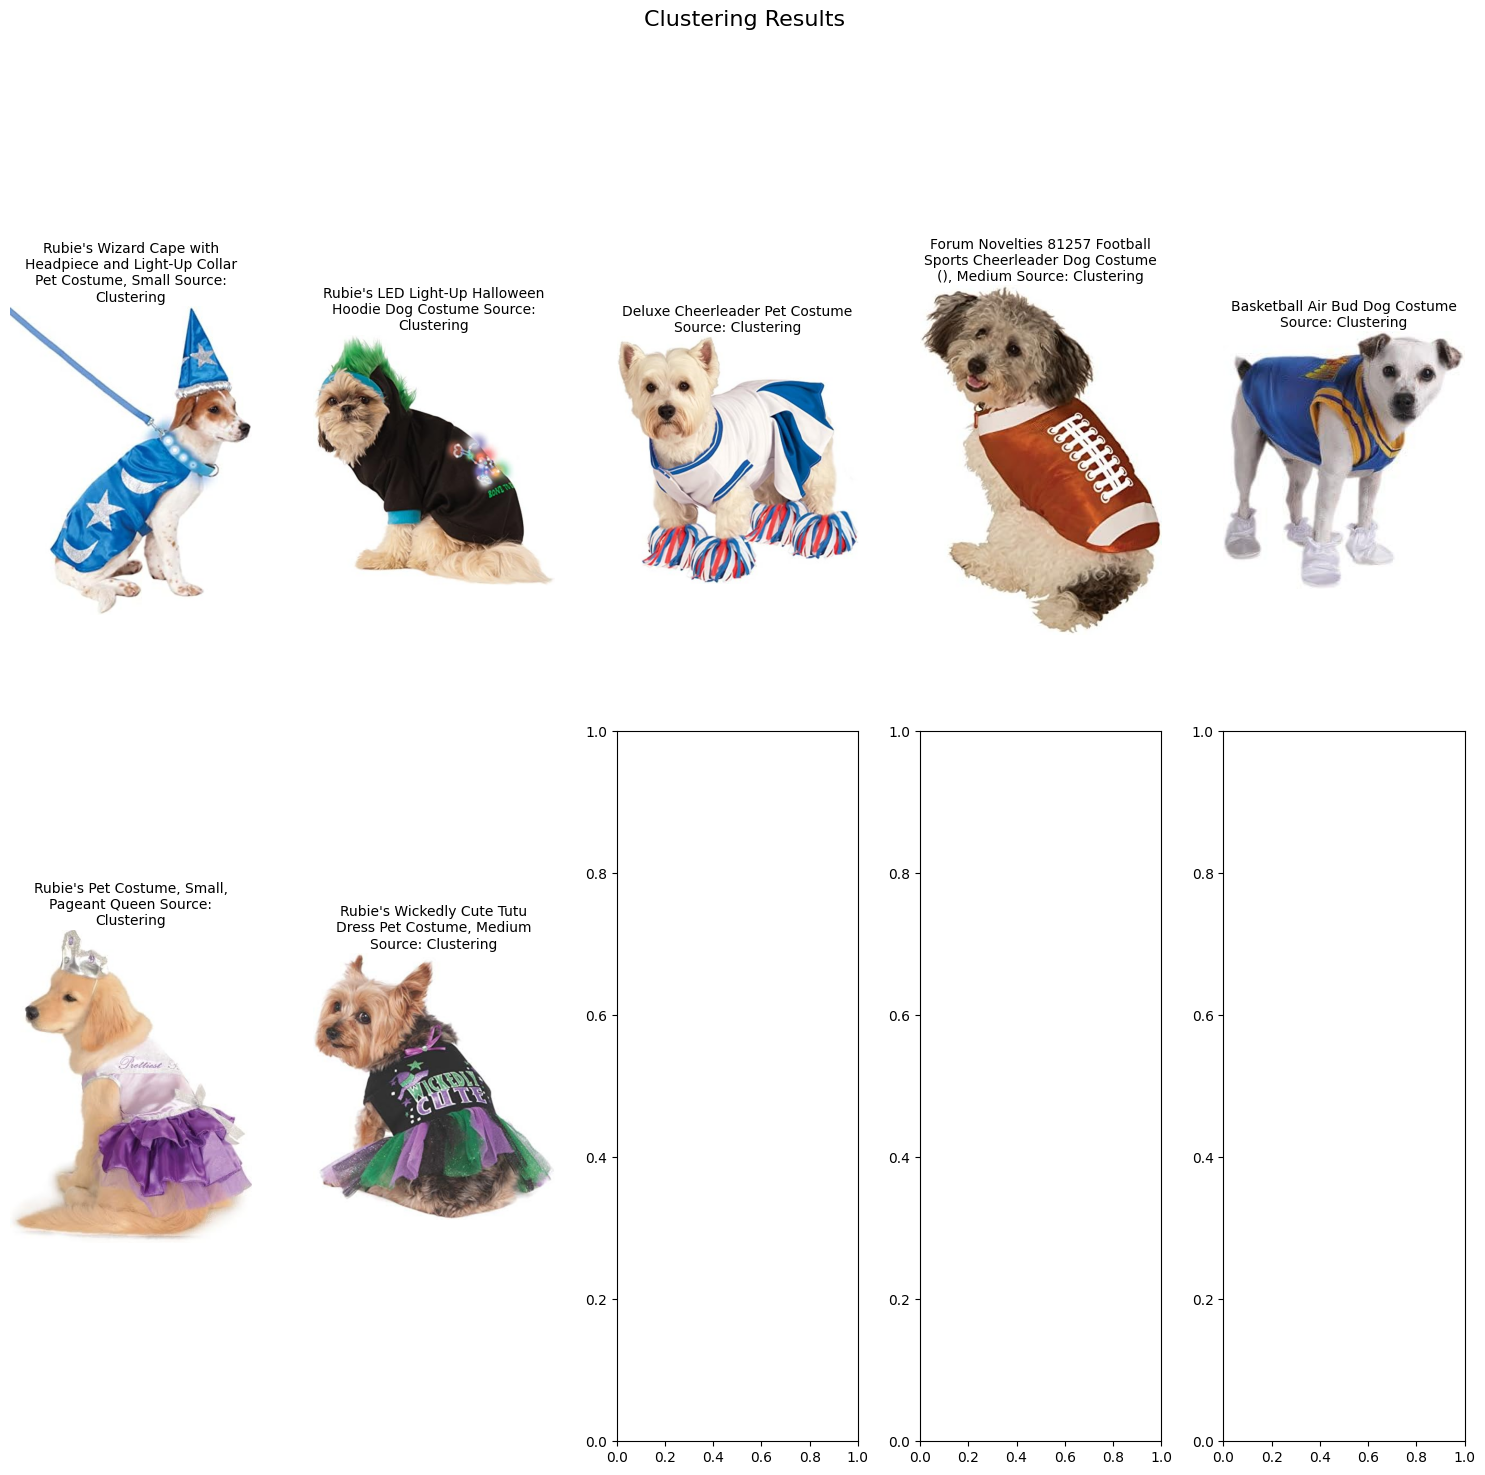

In [33]:
plot_product_recommendations(top_products_df, 'Clustering Results')

## ROUGE Score Verification using OPEN AI API and GPT-4o

In [34]:
!pip install openai==1.55.3 httpx==0.28.0 evaluate rouge_score --q

In [35]:
# !pip install openai==1.55.3 httpx==0.27.2 evaluate rouge_score --q

In [36]:
#Load Necessary Libraries
import openai
import pandas as pd
from google.colab import userdata
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA, KernelPCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from openai import OpenAI
from tqdm import tqdm
import re
import requests
from PIL import Image
from io import BytesIO
import evaluate


openai.api_key = userdata.get('OPENAI_API_KEY')
client = OpenAI(api_key = openai.api_key)
rouge_scorer = evaluate.load('rouge')

In [37]:
#Function to Create User Queries from Titles and Images of Product Recommendations
#Define Function for Creating User Queries using GPT-4o

def create_user_queries(df, user_query):

  for i in tqdm(range(len(df))):

    response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
      {
        "role": "system",
        "content": [
          {
            "type": "text",
            "text": f"""
            You are a helpful assistant that can read text and images and create user queries that people may use to search on Amazon.
            Create one user query using the Product Image URL that describes the image.
            Make sure that the query you create does not exceed more than 50 characters.
            Do not create queries beginning with 'I want to buy a' or 'I need a'.
            Make sure that the user query has any of has any colors or shapes or objects present in the image.
            Use the Product Title to assist with the creation of the user query but do not rely solely on it.
            """
          }
        ]
      },
      {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"""
                  Product Title: {df.loc[i, 'title']}
                  """
        },
        {
            "type": "image_url",
            "image_url": {
              "url": df.loc[i, 'image_url']
            }
        }
      ]
    }
    ],
    response_format={
      "type": "text"
    },
    temperature=1,
    max_tokens=200,
    frequency_penalty=0,  # Ensure identical scoring
    presence_penalty=0,    # Avoid varying novelty
    top_p=1
  )


    # print(response.choices[0].message.content)
    s = response.choices[0].message.content
    print(f"Title: {df.loc[i, 'title']}")
    print(f"Image URL: {df.loc[i, 'image_url']}")
    print(f"User Query: {s}")

    df.loc[i, 'gpt_user_query'] = s

    rouge_score = rouge_scorer.compute(predictions = [s], references = [user_query])

    df.loc[i, 'ROUGE-1'] = rouge_score['rouge1']
    df.loc[i, 'ROUGE-2'] = rouge_score['rouge2']
    df.loc[i, 'ROUGE-L'] = rouge_score['rougeL']
    df.loc[i, 'ROUGE-LSum'] = rouge_score['rougeLsum']

  return df

In [38]:
#SemantiScout Results
result_df = result_df.reset_index(drop = True)
result_df = create_user_queries(result_df, "superhero dog costumes")
result_df

 10%|█         | 1/10 [00:01<00:15,  1.75s/it]

Title: DC Comics for Pets Superman Dog Harness | Superman Dog Costume No Pull Dog Harness | Dog Harness with Superman Cape | Superman Dog Apparel & Accessories Dog Harness for Medium Dogs, Size M
Image URL: https://m.media-amazon.com/images/I/4107aKdE-YL._AC_.jpg
User Query: Superman dog harness with cape, medium


 20%|██        | 2/10 [00:03<00:13,  1.71s/it]

Title: DC Comics Wonder Woman Pet Cape, Small
Image URL: https://m.media-amazon.com/images/I/412hL2k1o+L._AC_.jpg
User Query: "Wonder Woman pet cape for small dogs"


 30%|███       | 3/10 [00:05<00:11,  1.67s/it]

Title: Rubie's Costume Co Marvel Spider-Man Pet Costume, XX-Large
Image URL: https://m.media-amazon.com/images/I/415l5T0xqvL._AC_.jpg
User Query: Spider-Man pet costume for large dogs


 40%|████      | 4/10 [00:06<00:10,  1.68s/it]

Title: Walking Boxer Kangaroo Pet Suit, Small
Image URL: https://m.media-amazon.com/images/I/41fAVKKzEcL._AC_.jpg
User Query: "Kangaroo Boxer Costume for Small Dogs"


 50%|█████     | 5/10 [00:08<00:08,  1.72s/it]

Title: DC Comics for Pets Batman Dog Harness, Medium | Soft and Comfortable No Pull Harness for Dogs, Dog Batman Costume | Cute Dog Harness, Dog Halloween Costume, Batman Harness, Puppy Harness, Pet Harness
Image URL: https://m.media-amazon.com/images/I/41nyQf0Sw8S._AC_.jpg
User Query: "Batman dog harness medium size"


 60%|██████    | 6/10 [00:10<00:06,  1.72s/it]

Title: DC Comics Pet Costume, Large, Batman
Image URL: https://m.media-amazon.com/images/I/41Nwxx3mP-L._AC_.jpg
User Query: Batman dog costume with cape


 70%|███████   | 7/10 [00:12<00:05,  1.76s/it]

Title: DC Comics Superman Dog Costume, Extra Large (XL) | Superhero Costume for Dogs | Red and Blue Dog Halloween Costumes for Large Dogs with Superman Cape | See Sizing Chart for Details
Image URL: https://m.media-amazon.com/images/I/410Fs+Kmt8L._AC_.jpg
User Query: "Superman dog costume XL red blue"


 80%|████████  | 8/10 [00:13<00:03,  1.77s/it]

Title: Rubie's Marvel Universe Spider-Man Pet Costume, Extra-Large
Image URL: https://m.media-amazon.com/images/I/41Bf4OeGvIL._AC_.jpg
User Query: "Spider-Man dog costume extra-large"


 90%|█████████ | 9/10 [00:15<00:01,  1.75s/it]

Title: Rubie's Marvel Universe Spider-Girl Pet Costume, Large
Image URL: https://m.media-amazon.com/images/I/41eboRdiAPL._AC_.jpg
User Query: "Spider-Girl pet costume red blue large"


100%|██████████| 10/10 [00:17<00:00,  1.75s/it]

Title: DC Comics Pet Costume, Superman, Large
Image URL: https://m.media-amazon.com/images/I/412SGiRvsSL._AC_.jpg
User Query: "Superman dog costume with cape"


,id,score,vector,description,image_url,main_category,parent_asin,text_image_cosine_similarity,title,source,gpt_user_query,ROUGE-1,ROUGE-2,ROUGE-L,ROUGE-LSum
0,B099TGLZDP,0.345946,"[0.228348702, -0.158734232, -0.326680899, -0.0...",DC Comics is ready for your superhero pet! Let...,https://m.media-amazon.com/images/I/4107aKdE-Y...,Health & Personal Care,B099TGLZDP,0.373282,DC Comics for Pets Superman Dog Harness | Supe...,Image,"Superman dog harness with cape, medium",0.222222,0.0,0.222222,0.222222
1,B01J9QDXM2,0.344586,"[0.583340168, -0.242418, 0.179397613, 0.027514...",Officially licensed DC Comics Wonder Woman pet...,https://m.media-amazon.com/images/I/412hL2k1o+...,Toys & Games,B01J9QDXM2,0.356287,"DC Comics Wonder Woman Pet Cape, Small",Image,"""Wonder Woman pet cape for small dogs""",0.000000,0.0,0.000000,0.000000
2,B06X94VWMD,0.337032,"[0.589341223, -0.00647443533, -0.0137767643, -...",Consult Rubie's Pet Size Chart and recent revi...,https://m.media-amazon.com/images/I/415l5T0xqv...,Toys & Games,B06X94VWMD,0.396041,Rubie's Costume Co Marvel Spider-Man Pet Costu...,Image,Spider-Man pet costume for large dogs,0.000000,0.0,0.000000,0.000000
3,B01J9QL3EM,0.333213,"[1.01422501, -0.558484197, -0.0930178463, 0.11...","With Rubie's costume Company, every member of ...",https://m.media-amazon.com/images/I/41fAVKKzEc...,Toys & Games,B01J9QL3EM,0.322689,"Walking Boxer Kangaroo Pet Suit, Small",Image,"""Kangaroo Boxer Costume for Small Dogs""",0.000000,0.0,0.000000,0.000000
4,B098JT1J4F,0.332124,"[0.515054703, -0.48204428, -0.342055172, -0.00...",Happy Halloween from Gotham! As Batman begins ...,https://m.media-amazon.com/images/I/41nyQf0Sw8...,Health & Personal Care,B098JT1J4F,0.357547,"DC Comics for Pets Batman Dog Harness, Medium ...",Image,"""Batman dog harness medium size""",0.250000,0.0,0.250000,0.250000
5,B07JMB72RC,0.329743,"[0.431292832, -0.297440737, 0.0753625929, 0.08...",Officially licensed DC Comics Heroes and Villa...,https://m.media-amazon.com/images/I/41Nwxx3mP-...,Toys & Games,B07JMB72RC,0.328825,"DC Comics Pet Costume, Large, Batman",Image,Batman dog costume with cape,0.250000,0.0,0.250000,0.250000
6,B0BR7HRX5V,0.328200,"[0.263139784, 0.327819973, 0.0820362121, 0.018...",Watch your four legged friend fly into action ...,https://m.media-amazon.com/images/I/410Fs+Kmt8...,Health & Personal Care,B0BR7HRX5V,0.372850,"DC Comics Superman Dog Costume, Extra Large (X...",Image,"""Superman dog costume XL red blue""",0.222222,0.0,0.222222,0.222222
7,B07J2KK8XZ,0.325505,"[0.642330348, -0.142014727, -0.0790133, 0.0545...",Spider-Man pet costume includes shirt and hood...,https://m.media-amazon.com/images/I/41Bf4OeGvI...,Toys & Games,B07J2KK8XZ,0.360244,Rubie's Marvel Universe Spider-Man Pet Costume...,Image,"""Spider-Man dog costume extra-large""",0.222222,0.0,0.222222,0.222222
8,B01J9QU8CK,0.324766,"[0.601526, -0.0819865316, 0.00722057372, -0.05...",Spider-Girl pet costume includes tutu dress an...,https://m.media-amazon.com/images/I/41eboRdiAP...,Toys & Games,B01J9QU8CK,0.349117,Rubie's Marvel Universe Spider-Girl Pet Costum...,Image,"""Spider-Girl pet costume red blue large""",0.000000,0.0,0.000000,0.000000
9,B07JMRSG96,0.324679,"[0.507463872, -0.104873151, -0.254870623, -0.0...",Officially licensed DC Comics Superman pet cos...,https://m.media-amazon.com/images/I/412SGiRvsS...,Toys & Games,B07JMRSG96,0.331095,"DC Comics Pet Costume, Superman, Large",Image,"""Superman dog costume with cape""",0.250000,0.0,0.250000,0.250000


In [39]:
#Clustering Results
top_products_df = top_products_df.reset_index(drop = True)
top_products_df = create_user_queries(top_products_df, "superhero dog costumes")
top_products_df

 14%|█▍        | 1/7 [00:01<00:08,  1.36s/it]

Title: Rubie's Wizard Cape with Headpiece and Light-Up Collar Pet Costume, Small
Image URL: https://m.media-amazon.com/images/I/41N9TXP33jL._AC_.jpg
User Query: "Blue wizard pet costume with stars and hat"


 29%|██▊       | 2/7 [00:03<00:09,  1.84s/it]

Title: Rubie's LED Light-Up Halloween Hoodie Dog Costume
Image URL: https://m.media-amazon.com/images/I/41HzUPhyJZL._AC_.jpg
User Query: "LED Halloween dog costume with green mohawk"


 43%|████▎     | 3/7 [00:06<00:10,  2.51s/it]

Title: Deluxe Cheerleader Pet Costume
Image URL: https://m.media-amazon.com/images/I/51k-WKozpWL._AC_.jpg
User Query: Cheerleader pet costume with pompoms


 57%|█████▋    | 4/7 [00:08<00:06,  2.16s/it]

Title: Forum Novelties 81257 Football Sports Cheerleader Dog Costume (), Medium
Image URL: https://m.media-amazon.com/images/I/41pDGbCbXwL._AC_.jpg
User Query: "Football Dog Costume Medium"


 71%|███████▏  | 5/7 [00:10<00:03,  1.96s/it]

Title: Basketball Air Bud Dog Costume
Image URL: https://m.media-amazon.com/images/I/31NFQ1zj4oL._AC_.jpg
User Query: "Dog basketball jersey costume"


 86%|████████▌ | 6/7 [00:12<00:01,  1.98s/it]

Title: Rubie's Pet Costume, Small, Pageant Queen
Image URL: https://m.media-amazon.com/images/I/41HnPoPM9RL._AC_.jpg
User Query: "Purple dog pageant dress with crown"


100%|██████████| 7/7 [00:14<00:00,  2.09s/it]

Title: Rubie's Wickedly Cute Tutu Dress Pet Costume, Medium
Image URL: https://m.media-amazon.com/images/I/41jm1llk3iL._AC_.jpg
User Query: "Wickedly Cute" dog tutu costume medium


,id,title,image_url,similarity,description,source,gpt_user_query,ROUGE-1,ROUGE-2,ROUGE-L,ROUGE-LSum
0,B07J293N14,Rubie's Wizard Cape with Headpiece and Light-U...,https://m.media-amazon.com/images/I/41N9TXP33j...,0.308527,Light-up wizard costume includes headpiece and...,Clustering,"""Blue wizard pet costume with stars and hat""",0.000000,0.0,0.000000,0.000000
1,B010QXXCOQ,Rubie's LED Light-Up Halloween Hoodie Dog Costume,https://m.media-amazon.com/images/I/41HzUPhyJZ...,0.305776,Your pup will light up the party in this LED H...,Clustering,"""LED Halloween dog costume with green mohawk""",0.200000,0.0,0.200000,0.200000
2,B002GWUE9M,Deluxe Cheerleader Pet Costume,https://m.media-amazon.com/images/I/51k-WKozpW...,0.300800,Blue and white cheerleader dress for your spir...,Clustering,Cheerleader pet costume with pompoms,0.000000,0.0,0.000000,0.000000
3,B07D3DVNMS,Forum Novelties 81257 Football Sports Cheerlea...,https://m.media-amazon.com/images/I/41pDGbCbXw...,0.297313,includes: one piece costume,Clustering,"""Football Dog Costume Medium""",0.285714,0.0,0.285714,0.285714
4,B004990KS0,Basketball Air Bud Dog Costume,https://m.media-amazon.com/images/I/31NFQ1zj4o...,0.290320,Have your best friend join in the holiday fest...,Clustering,"""Dog basketball jersey costume""",0.285714,0.0,0.285714,0.285714
5,B07BWN3WHG,"Rubie's Pet Costume, Small, Pageant Queen",https://m.media-amazon.com/images/I/41HnPoPM9R...,0.286099,This Pageant Queen pet costume includes a two ...,Clustering,"""Purple dog pageant dress with crown""",0.222222,0.0,0.222222,0.222222
6,B07J2GHQ1K,"Rubie's Wickedly Cute Tutu Dress Pet Costume, ...",https://m.media-amazon.com/images/I/41jm1llk3i...,0.285692,Rubie's Costume Company has designed quality c...,Clustering,"""Wickedly Cute"" dog tutu costume medium",0.222222,0.0,0.222222,0.222222


In [40]:
import numpy as np


print(f"SemantiScout - Average ROUGE-1 Score: {np.mean(result_df['ROUGE-1'])}")
print(f"SemantiScout - Average ROUGE-2 Score: {result_df['ROUGE-2'].mean()}")
print(f"SemantiScout - Average ROUGE-L Score: {np.mean(result_df['ROUGE-L'])}")

print(f"Clustering - Average ROUGE-1 Score: {np.mean(top_products_df['ROUGE-1'])}")
print(f"Clustering - Average ROUGE-2 Score: {top_products_df['ROUGE-2'].mean()}")
print(f"Clustering - Average ROUGE-L Score: {np.mean(top_products_df['ROUGE-L'])}")

SemantiScout - Average ROUGE-1 Score: 0.14166666666666666
SemantiScout - Average ROUGE-2 Score: 0.0
SemantiScout - Average ROUGE-L Score: 0.14166666666666666
Clustering - Average ROUGE-1 Score: 0.17369614512471657
Clustering - Average ROUGE-2 Score: 0.0
Clustering - Average ROUGE-L Score: 0.17369614512471657


In [41]:
from sentence_transformers import SentenceTransformer, util
import torch
import torch.nn.functional as F
from transformers import AutoModel, AutoTokenizer


model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight zero-shot similarity model
# model = SentenceTransformer('llmrails/ember-v1')
# model = SentenceTransformer('BAAI/bge-base-en-v1.5')
# model = SentenceTransformer('WhereIsAI/UAE-Large-V1')
# model = SentenceTransformer('mixedbread-ai/mxbai-embed-2d-large-v1')

# tokenizer = AutoTokenizer.from_pretrained("hyp1231/blair-roberta-base")
# model = AutoModel.from_pretrained("hyp1231/blair-roberta-base")

def cosine_similarity(sentence1, sentence2):
    return util.cos_sim(model.encode(sentence1), model.encode(sentence2))

# def cosine_similarity(sentence1, sentence2): #Uncomment this function if using BLAIR Model
#   texts = [sentence1, sentence2]
#   inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
#   with torch.no_grad():
#     embeddings = model(**inputs, return_dict=True).last_hidden_state[:, 0]
#     embeddings = embeddings / embeddings.norm(dim=1, keepdim=True)

#   return embeddings[0] @ embeddings[1]


result_df_similarities = []

for i in range(len(result_df)):
  result_df_similarities.append(cosine_similarity("superhero dog costumes", result_df.loc[i, 'gpt_user_query']))

print(f"SemantiScout Results - Average Cosine Similarity: {np.mean(result_df_similarities)}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SemantiScout Results - Average Cosine Similarity: 0.6533375382423401


In [42]:
result_df_similarities

[tensor([[0.6238]]),
 tensor([[0.5533]]),
 tensor([[0.7132]]),
 tensor([[0.6288]]),
 tensor([[0.5651]]),
 tensor([[0.7738]]),
 tensor([[0.7351]]),
 tensor([[0.6541]]),
 tensor([[0.5148]]),
 tensor([[0.7713]])]

In [43]:
top_products_df_similarities = []

for i in range(len(top_products_df)):
  top_products_df_similarities.append(cosine_similarity("superhero dog costumes", top_products_df.loc[i, 'gpt_user_query']))

print(f"Clustering Results - Average Cosine Similarity: {np.mean(top_products_df_similarities)}")

Clustering Results - Average Cosine Similarity: 0.5767577290534973


In [44]:
top_products_df_similarities

[tensor([[0.5136]]),
 tensor([[0.5485]]),
 tensor([[0.6182]]),
 tensor([[0.5961]]),
 tensor([[0.5942]]),
 tensor([[0.5380]]),
 tensor([[0.6287]])]